
### Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## plan

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
*  a neural network using Keras.


## ## Let's begin: preparing data



In [1]:

import pandas as pd
data=pd.read_csv('mammographic_masses.data.txt')
data.head(10)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0
5,4,70,?,?,3,0
6,5,42,1,?,3,0
7,5,57,1,5,3,1
8,5,60,?,5,1,1
9,5,76,1,4,3,1


## add the appropriate column names (BI_RADS, age, shape, margin, density, and severity)

In [2]:
import pandas as pd  

# Lire le fichier CSV, '?' comme valeurs manquantes, définir les noms des colonnes
data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names=['bi_rads', 'age', 'shape', 'margin', 'density', 'severnity'])

data.head()  # Afficher les premières lignes


,bi_rads,age,shape,margin,density,severnity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


## Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [3]:
print(data.describe())  # Afficher les statistiques descriptives

          bi_rads         age       shape      margin     density   severnity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000


## There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [4]:
# Calculate percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values:")
print(missing_percentage)


Percentage of missing values:
bi_rads      0.208117
age          0.520291
shape        3.225806
margin       4.994797
density      7.908429
severnity    0.000000
dtype: float64


###  the missing data seems randomly distributed=> drop rows with missing data. Hint: use dropna().

In [5]:
# Drop rows with missing data
data.dropna(inplace=True)

### convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. 
### Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [6]:
# Code cell
# Extract feature data and class labels
X = data[['age', 'shape', 'margin', 'density']].values
y = data['severnity'].values

# Feature labels
feature_labels = ['age', 'shape', 'margin', 'density']


### Some of our models require the input data to be normalized, so let's normalize the attribute data. 
### use preprocessing.StandardScaler().

In [7]:
# Code cell
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the feature data
X_normalized = scaler.fit_transform(X)


## ## Decision Trees

Before moving to K-Fold cross validation and random forests, we will start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [8]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)


## Now create a DecisionTreeClassifier and fit it to your training data.

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

## Display the resulting decision tree.

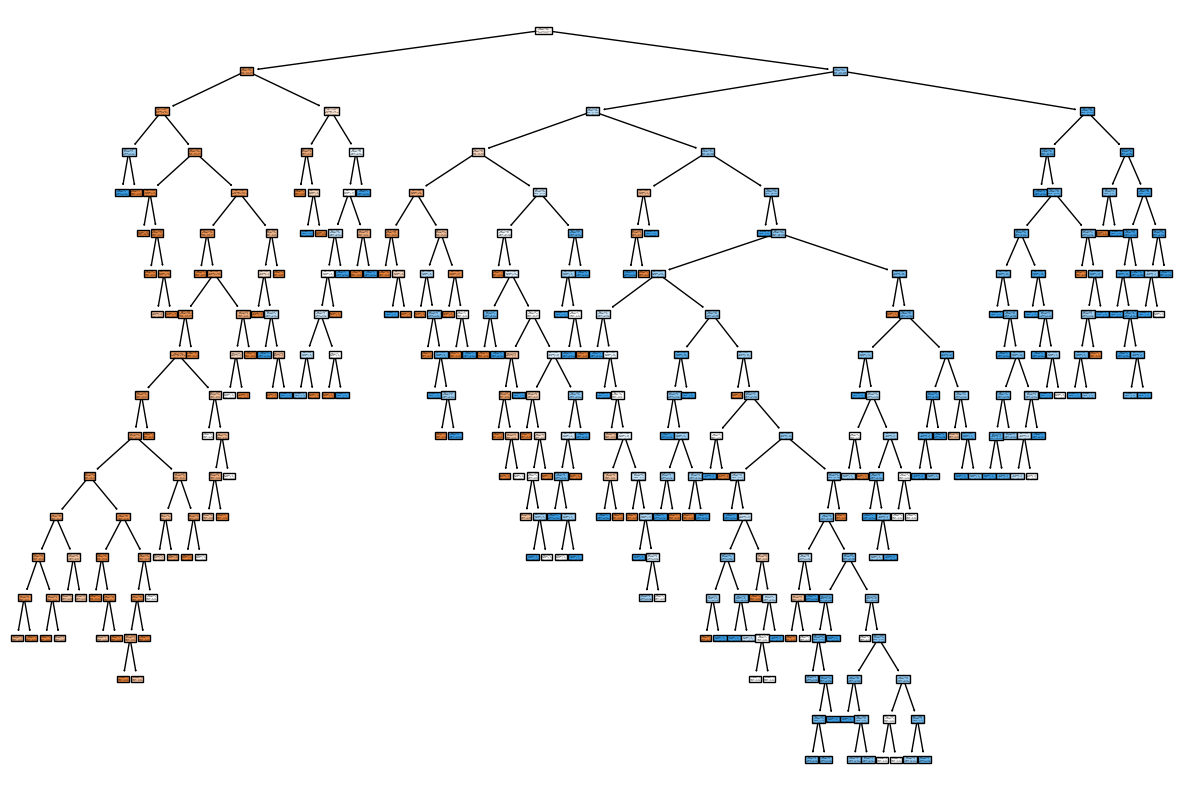

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=feature_labels, class_names=['benign', 'malignant'], filled=True)
plt.show()


## Measure the accuracy of the resulting decision tree model using  test data.

In [11]:
# Code cell
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", accuracy)


Decision Tree accuracy: 0.7692307692307693


## Now instead of a single train/test split, let's use K-Fold cross validation to get a better measure of our model's accuracy (K=10). ? use model_selection.cross_val_score

In [12]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold cross-validation (K=10)
dt_cv_scores = cross_val_score(dt_classifier, X_normalized, y, cv=10)

# Print the cross-validation scores
print("Decision Tree CV Accuracy:", dt_cv_scores)

# Calculate the mean accuracy of the cross-validation scores
mean_accuracy = dt_cv_scores.mean()
print("Mean Decision Tree CV Accuracy:", mean_accuracy)


Decision Tree CV Accuracy: [0.73493976 0.74698795 0.73493976 0.75903614 0.77108434 0.69879518
 0.73493976 0.74698795 0.75903614 0.69879518]
Mean Decision Tree CV Accuracy: 0.7385542168674698


## Now let's  try a RandomForestClassifier instead. Does it perform better? ghaliban ah

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Predict using the test data
rf_predictions = random_forest.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest accuracy (single split):", rf_accuracy)


from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
rf_cv_scores = cross_val_score(random_forest, X_normalized, y, cv=10)

# Print the cross-validation scores and the mean score
print("Random Forest CV Accuracy:", rf_cv_scores)
print("Mean Random Forest CV Accuracy:", rf_cv_scores.mean())


Random Forest accuracy (single split): 0.7980769230769231
Random Forest CV Accuracy: [0.72289157 0.80722892 0.80722892 0.75903614 0.80722892 0.72289157
 0.77108434 0.78313253 0.77108434 0.68674699]
Mean Random Forest CV Accuracy: 0.763855421686747


### SVM

Now let's try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [14]:
#svm=> cherche  l'hyperplan optimal séparant les classes de données avec la marge maximale.
#Train and Test with a Single Split
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict using the test data
svm_predictions = svm_classifier.predict(X_test)

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM accuracy (single split):", svm_accuracy)


SVM accuracy (single split): 0.8413461538461539


In [15]:
#Evaluate with K-Fold Cross-Validation
# Perform 10-fold cross-validation with SVM
svm_cv_scores = cross_val_score(svm_classifier, X_normalized, y, cv=10)

# Print the cross-validation scores and the mean score
print("SVM CV Accuracy:", svm_cv_scores)
print("Mean SVM CV Accuracy:", svm_cv_scores.mean())


SVM CV Accuracy: [0.71084337 0.79518072 0.84337349 0.80722892 0.84337349 0.72289157
 0.79518072 0.81927711 0.87951807 0.75903614]
Mean SVM CV Accuracy: 0.7975903614457832


## ## KNN
How about K-Nearest-Neighbors? 
###### use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [16]:
#Train and Test with a Single Split
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with a K of 10
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Predict using the test data
knn_predictions = knn_classifier.predict(X_test)

# Calculate the accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN accuracy (single split):", knn_accuracy)

##Evaluate with K-Fold Cross-Validation
# Perform 10-fold cross-validation with KNN
knn_cv_scores = cross_val_score(knn_classifier, X_normalized, y, cv=10)

# Print the cross-validation scores and the mean score
print("KNN CV Accuracy:", knn_cv_scores)
print("Mean KNN CV Accuracy:", knn_cv_scores.mean())


KNN accuracy (single split): 0.8173076923076923
KNN CV Accuracy: [0.73493976 0.79518072 0.80722892 0.75903614 0.86746988 0.73493976
 0.85542169 0.81927711 0.80722892 0.74698795]
Mean KNN CV Accuracy: 0.7927710843373493


## Choosing K is tricky, so we can't discard KNN until we've tried different values of K. SOLUTION: Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference.

In [17]:
best_k = 0
best_accuracy = 0

for k in range(1, 51):
    # Initialize the KNN classifier with the current K value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 10-fold cross-validation with KNN
    knn_cv_scores = cross_val_score(knn_classifier, X_normalized, y, cv=10)
    
    # Calculate the mean cross-validation accuracy
    mean_accuracy = knn_cv_scores.mean()
    
    # Check if the current K value gives better accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

print("Best K value for KNN:", best_k)
print("Best KNN CV Accuracy:", best_accuracy)


Best K value for KNN: 7
Best KNN CV Accuracy: 0.7975903614457832


## ## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? we'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [18]:
# Naive Bayes est une famille d'algorithmes de classification basés sur le théorème de Bayes, qui suppose que les caractéristiques d'un ensemble de données sont indépendantes les unes des autres.
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature data
X_scaled = scaler.fit_transform(X)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform 10-fold cross-validation with MultinomialNB
nb_cv_scores = cross_val_score(nb_classifier, X_scaled, y, cv=10)

# Print the cross-validation scores and the mean score
print("Multinomial Naive Bayes CV Accuracy:", nb_cv_scores)
print("Mean Multinomial Naive Bayes CV Accuracy:", nb_cv_scores.mean())


Multinomial Naive Bayes CV Accuracy: [0.73493976 0.78313253 0.79518072 0.8313253  0.8313253  0.78313253
 0.74698795 0.75903614 0.89156627 0.69879518]
Mean Multinomial Naive Bayes CV Accuracy: 0.7855421686746988


## ## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [19]:
# Importer les modules nécessaires
from sklearn import svm  # Support Vector Machine
from sklearn.preprocessing import StandardScaler  # Normalisation des données
from sklearn.model_selection import cross_val_score, train_test_split  # Validation croisée et division des données


In [20]:
#Set Up and Normalize the Data
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split

In [21]:
#Train and Evaluate the SVM with Different Kernels
kernels = ['rbf', 'sigmoid', 'poly']
svm_results = {}

for kernel in kernels:
    # Create the SVM model with the specified kernel
    svm_model = svm.SVC(kernel=kernel)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    scores = cross_val_score(svm_model, X_scaled, y, cv=10)
    
    # Store results
    svm_results[kernel] = {
        'CV Accuracy Scores': scores,
        'Mean CV Accuracy': scores.mean()
    }

# Print results for each kernel
for kernel, results in svm_results.items():
    print(f"SVM with {kernel} kernel - CV Scores: {results['CV Accuracy Scores']}")
    print(f"SVM with {kernel} kernel - Mean CV Accuracy: {results['Mean CV Accuracy']:.4f}")


SVM with rbf kernel - CV Scores: [0.74698795 0.80722892 0.8313253  0.80722892 0.86746988 0.73493976
 0.75903614 0.77108434 0.84337349 0.77108434]
SVM with rbf kernel - Mean CV Accuracy: 0.7940
SVM with sigmoid kernel - CV Scores: [0.3373494  0.25301205 0.20481928 0.22891566 0.21686747 0.31325301
 0.26506024 0.21686747 0.31325301 0.26506024]
SVM with sigmoid kernel - Mean CV Accuracy: 0.2614
SVM with poly kernel - CV Scores: [0.74698795 0.81927711 0.85542169 0.79518072 0.84337349 0.72289157
 0.78313253 0.74698795 0.87951807 0.72289157]
SVM with poly kernel - Mean CV Accuracy: 0.7916


## ## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [22]:
#Import and Initialize the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()


In [23]:
# Code cell
#Fit the Model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [24]:
# Code cell
#Evaluate the Model
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
mean_accuracy = scores.mean()

print("Logistic Regression - CV Scores:", scores)
print("Logistic Regression - Mean CV Accuracy:", mean_accuracy)


Logistic Regression - CV Scores: [0.74603175 0.82539683 0.79032258 0.79032258 0.87096774 0.79032258
 0.83870968 0.77419355 0.77419355 0.77419355]
Logistic Regression - Mean CV Accuracy: 0.7974654377880185


## ## Neural Networks

As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [25]:
# Code cell
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define your features (X) and target (y)
features = data.drop(columns=['severnity'])  # Assuming 'severnity' is the target column
target = data['severnity']  # Correctly specify the target column


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6509 - loss: 0.6634 - val_accuracy: 0.6960 - val_loss: 0.6663
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7120 - loss: 0.6437 - val_accuracy: 0.7280 - val_loss: 0.6477
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 0.6358 - val_accuracy: 0.7440 - val_loss: 0.6299
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7594 - loss: 0.6096 - val_accuracy: 0.7680 - val_loss: 0.6137
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7716 - loss: 0.5865 - val_accuracy: 0.7680 - val_loss: 0.5979
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8079 - loss: 0.5547 - val_accuracy: 0.7680 - val_loss: 0.5812
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8143 - loss: 0.5434 - val_accuracy: 0.7760 - val_loss: 0.5656
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7907 - loss: 0.5360 - val_accuracy: 0.7760 -

Test Accuracy: 0.8606


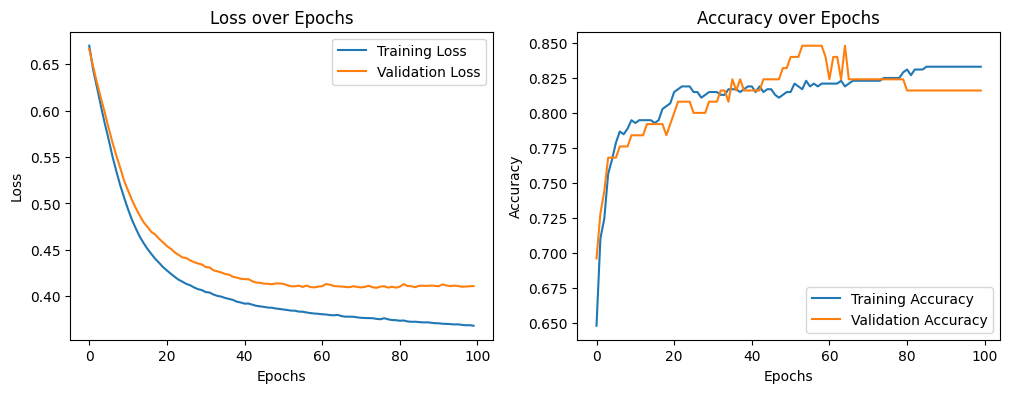

In [26]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# Save the model
model.save('trained_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
